In [1]:
# Our essentials
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier



import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from data_clean import confusion_table, replace_obj_cols
#Acquire functions
from acquire import new_telco_churn_data, get_telco_churn_data


Acquire Stage

In [2]:
# function will call new_telco_churn_data() will return telco_churn db from SQL into a pandas df


df = new_telco_churn_data()

In [3]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [4]:
#get_telco_churn_data() will return telco_churn db from SQL into a pandas df and create a .csv for us
df = get_telco_churn_data()

In [5]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [6]:
#looking into data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
# Looking at the statistics of the columns to get a feel for the numbers

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
#value counts
df.value_counts()

payment_type_id  contract_type_id  internet_service_type_id  customer_id  gender  senior_citizen  partner  dependents  tenure  phone_service  multiple_lines    online_security      online_backup        device_protection    tech_support         streaming_tv         streaming_movies     paperless_billing  monthly_charges  total_charges  churn  internet_service_type  contract_type   payment_type             
1                1                 1                         0015-UOCOJ   Female  1               No       No          7       Yes            No                Yes                  No                   No                   No                   No                   No                   Yes                48.20            340.35         No     DSL                    Month-to-month  Electronic check             1
3                2                 1                         8469-SNFFH   Male    0               Yes      No          70      Yes            Yes               Yes              

<AxesSubplot:xlabel='tenure', ylabel='Density'>

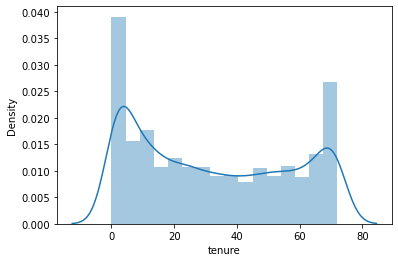

In [9]:
#distribution of tenure: we have a lot who stay for a long time, but a lot more who stay only for a short period.
sns.distplot(df.tenure)

<AxesSubplot:xlabel='monthly_charges', ylabel='Density'>

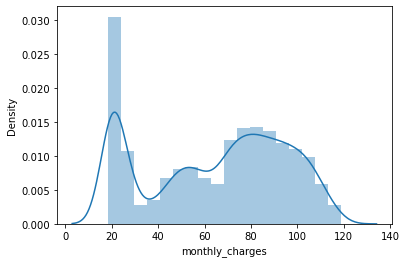

In [10]:
sns.distplot(df.monthly_charges)

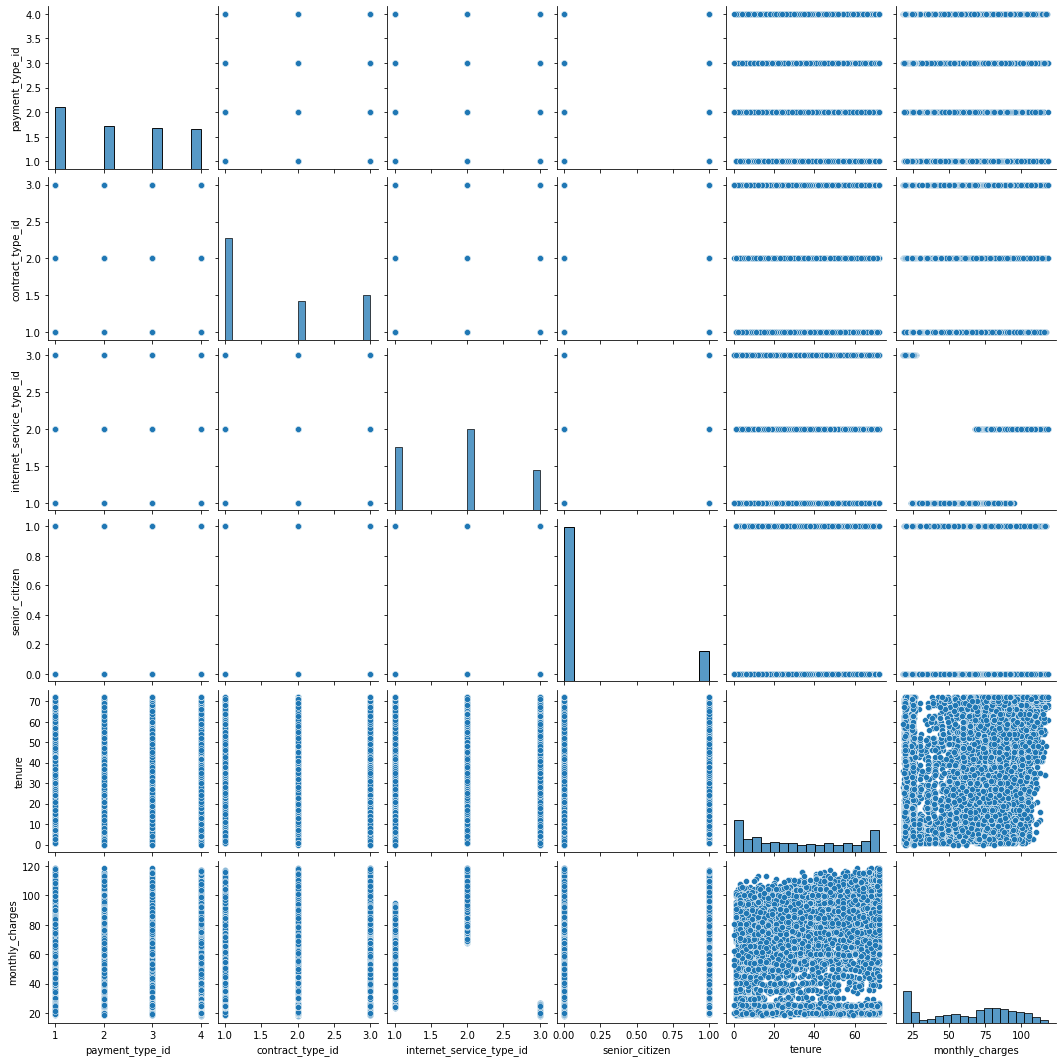

In [11]:
sns.pairplot(df)

In [12]:
# Prepare Stage


In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from env import host, username, password
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from prepare import num_distributions, clean_telco_churn, telco_churn_split, prep_telco_churn

In [14]:
##embedded within prep function.
df = clean_telco_churn(df)

In [15]:
df.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0030-FNXPP,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0031-PVLZI,0,1,1,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0098-BOWSO,0,0,0,27,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0107-WESLM,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0114-RSRRW,0,1,0,10,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [16]:
telco_churn_split(df)

(     customer_id  senior_citizen  partner  dependents  tenure  phone_service  \
 5707  5605-XNWEN               1        1           0      72              1   
 4471  4355-CVPVS               0        1           1      56              1   
 4994  3915-ODIYG               1        0           0      60              1   
 3458  6575-SUVOI               1        1           0      25              1   
 3818  9504-DSHWM               0        0           0      20              1   
 ...          ...             ...      ...         ...     ...            ...   
 4258  0406-BPDVR               1        1           0      54              1   
 328   6040-CGACY               0        0           0      15              1   
 1405  4102-OQUPX               1        1           0       1              1   
 4266  0512-FLFDW               1        1           0      60              1   
 6864  7197-VOJMM               0        1           0      67              1   
 
       multiple_lines  onl

In [17]:
#testing a prep function designed to clean the data and split into train, validate, and test groups!
prep_telco_churn(df)

(     customer_id  senior_citizen  partner  dependents  tenure  phone_service  \
 5707  5605-XNWEN               1        1           0      72              1   
 4471  4355-CVPVS               0        1           1      56              1   
 4994  3915-ODIYG               1        0           0      60              1   
 3458  6575-SUVOI               1        1           0      25              1   
 3818  9504-DSHWM               0        0           0      20              1   
 ...          ...             ...      ...         ...     ...            ...   
 4258  0406-BPDVR               1        1           0      54              1   
 328   6040-CGACY               0        0           0      15              1   
 1405  4102-OQUPX               1        1           0       1              1   
 4266  0512-FLFDW               1        1           0      60              1   
 6864  7197-VOJMM               0        1           0      67              1   
 
       multiple_lines  onl

In [18]:
#a repeat of acquiring and saving it to a .csv
df = get_telco_churn_data()

In [19]:
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [20]:
#this function does all of the steps above! embedded within prep function.
df = clean_telco_churn(df)

In [21]:
df.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0030-FNXPP,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0031-PVLZI,0,1,1,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0098-BOWSO,0,0,0,27,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0107-WESLM,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0114-RSRRW,0,1,0,10,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [22]:
#splits the data for us! embedded within prep function.
telco_churn_split(df)

(     customer_id  senior_citizen  partner  dependents  tenure  phone_service  \
 5707  5605-XNWEN               1        1           0      72              1   
 4471  4355-CVPVS               0        1           1      56              1   
 4994  3915-ODIYG               1        0           0      60              1   
 3458  6575-SUVOI               1        1           0      25              1   
 3818  9504-DSHWM               0        0           0      20              1   
 ...          ...             ...      ...         ...     ...            ...   
 4258  0406-BPDVR               1        1           0      54              1   
 328   6040-CGACY               0        0           0      15              1   
 1405  4102-OQUPX               1        1           0       1              1   
 4266  0512-FLFDW               1        1           0      60              1   
 6864  7197-VOJMM               0        1           0      67              1   
 
       multiple_lines  onl

In [23]:
df.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0030-FNXPP,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0031-PVLZI,0,1,1,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0098-BOWSO,0,0,0,27,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0107-WESLM,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0114-RSRRW,0,1,0,10,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [24]:
#train, validate, test groups
train, validate, test = prep_telco_churn(df)

In [25]:
#assuring column numbers are the same
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

In [26]:
#checking
train.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
5707,5605-XNWEN,1,1,0,72,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4471,4355-CVPVS,0,1,1,56,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4994,3915-ODIYG,1,0,0,60,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
3458,6575-SUVOI,1,1,0,25,1,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3818,9504-DSHWM,0,0,0,20,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [27]:
## Explore